In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
red_wine = pd.read_csv("dataset/winequality-red.csv", sep= ";")
white_wine = pd.read_csv("dataset/winequality-white.csv", sep= ";")

In [3]:
red_wine["color"]= "Red"
white_wine["color"]= "White"

In [4]:
wine = pd.concat([red_wine, white_wine])

## White Wine, Red Wine and Combination of Red and White Wine Heat Map

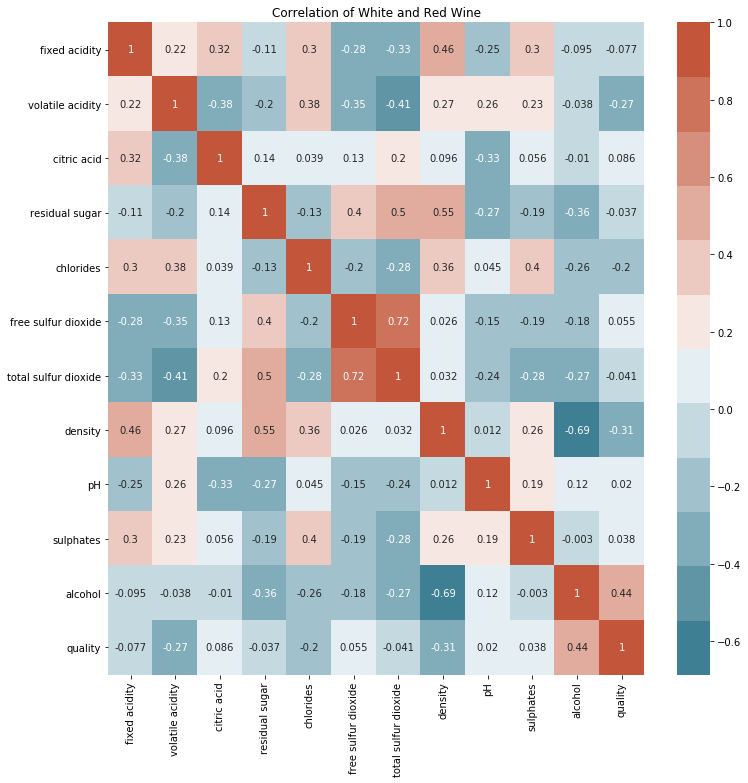

In [38]:
plt.figure(figsize=(12, 12))
df_corr = wine.corr()
sns.heatmap(df_corr, cmap=sns.diverging_palette(220, 20, n=12), annot=True)
plt.title("Correlation of White and Red Wine")
plt.show()

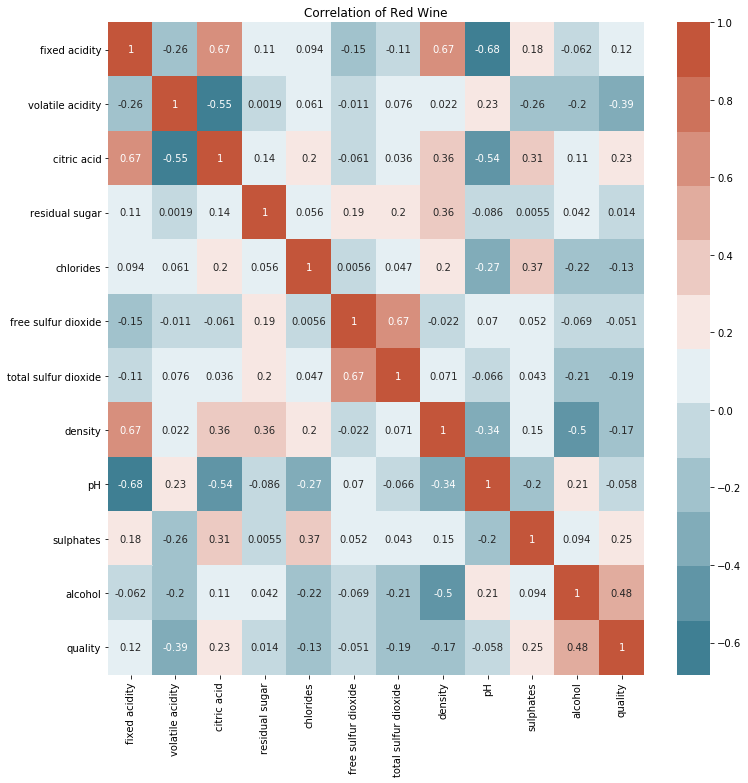

In [37]:
plt.figure(figsize=(12, 12))
df_corr = red_wine.corr()
sns.heatmap(df_corr, cmap=sns.diverging_palette(220, 20, n=12), annot=True)
plt.title("Correlation of Red Wine")
plt.show()

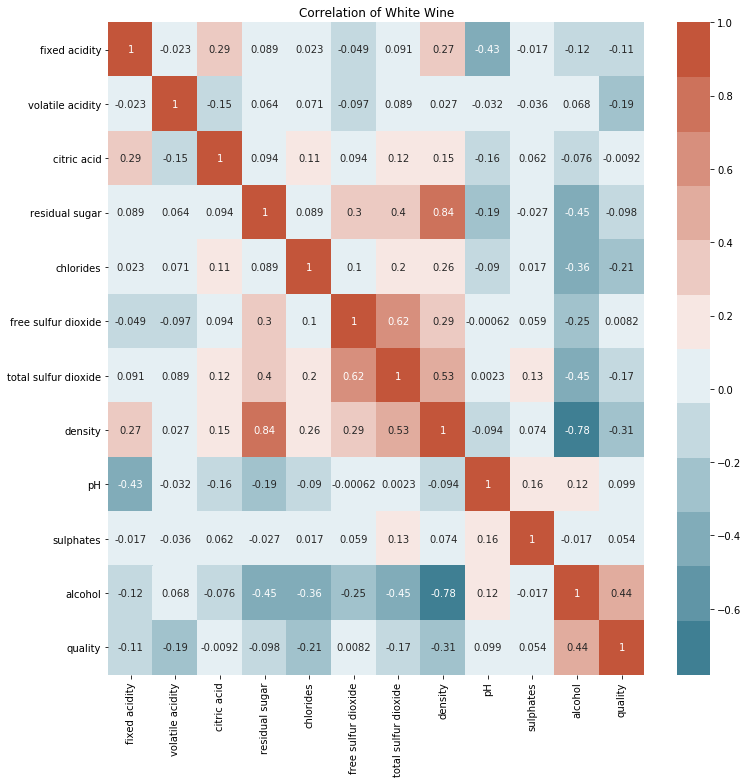

In [36]:
plt.figure(figsize=(12, 12))
df_corr = white_wine.corr()
sns.heatmap(df_corr, cmap=sns.diverging_palette(220, 20, n=12), annot=True)
plt.title("Correlation of White Wine")
plt.show()

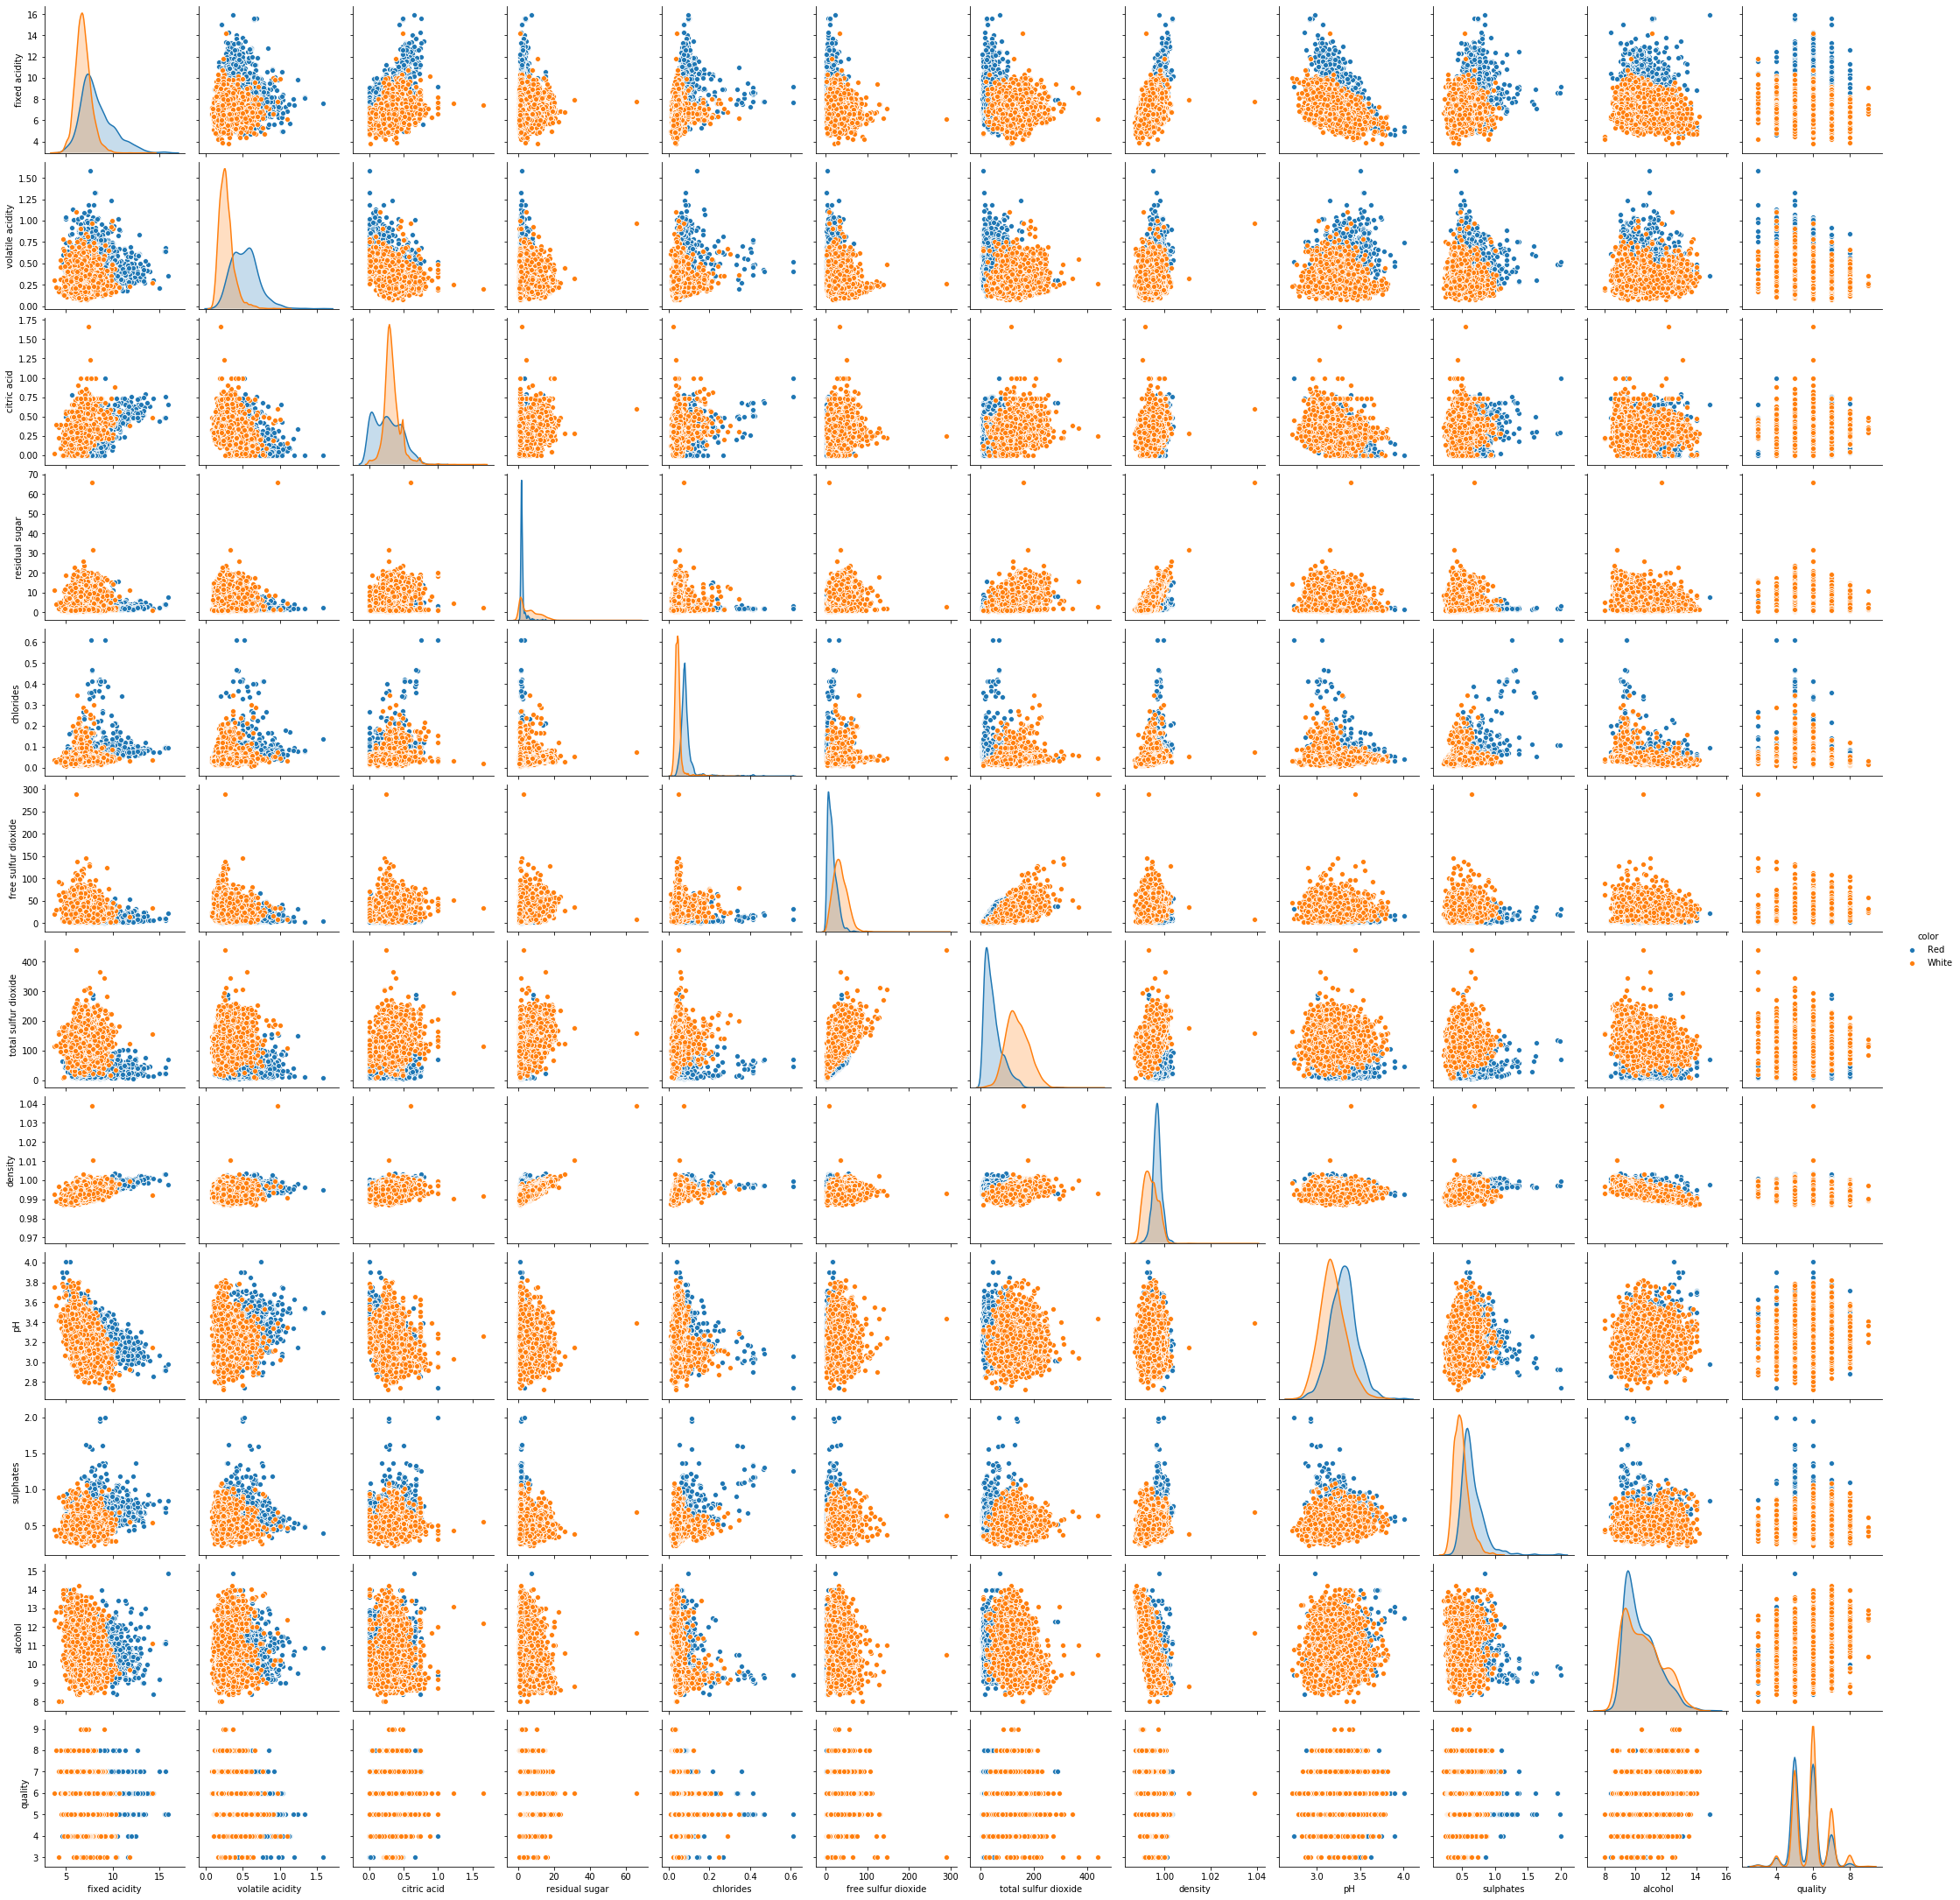

In [40]:
sns.pairplot(wine, hue= "color")
plt.show()

## Volatile Acidity and Alcohol distribution for Quality (Red & White)

In [9]:
color_dict = {"white": "#FCF5DB", "red": "#BD1414"}

'The Correlaton between quality of White Wine and alcohol is: 0.44'

'The Correlaton between quality of Red Wine and alcohol is: 0.48'

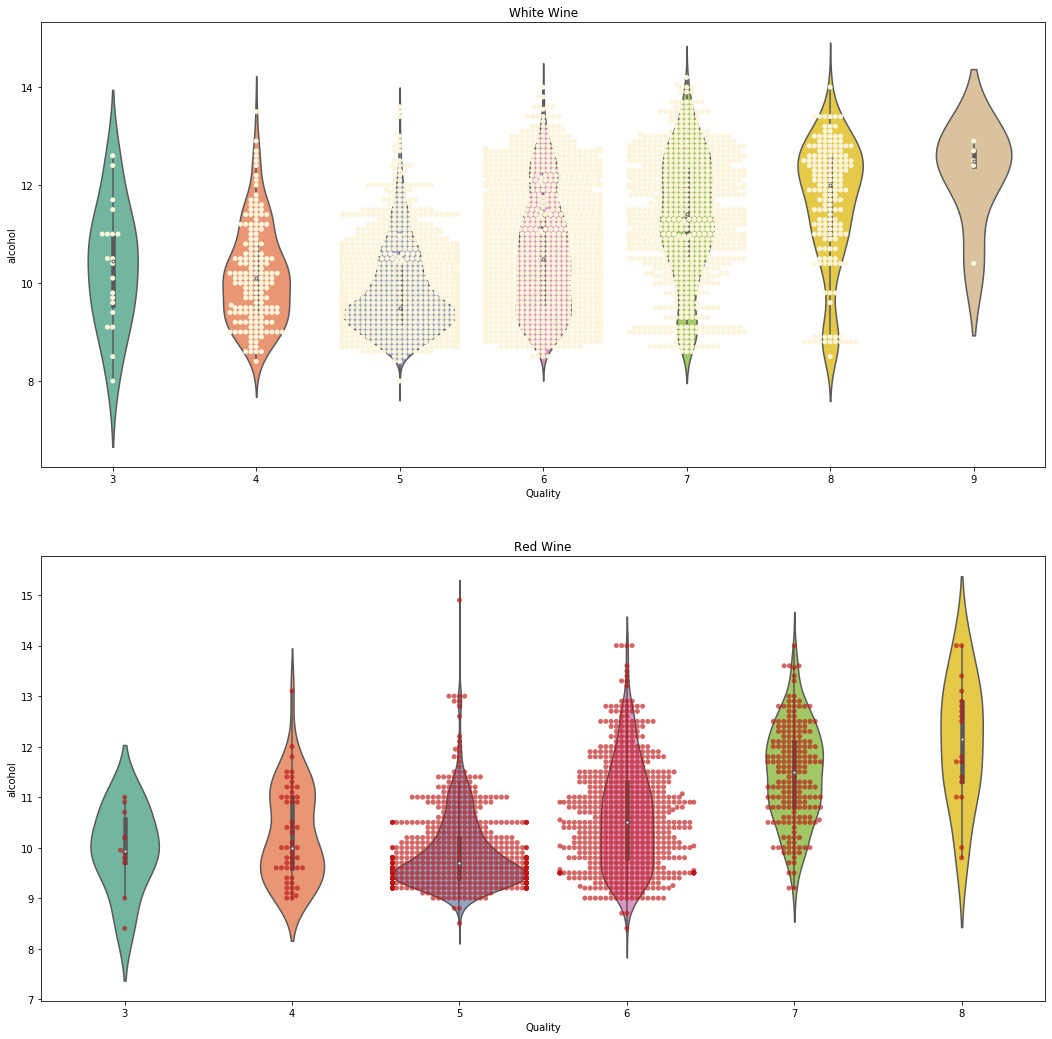

In [10]:
fig,ax = plt.subplots(2,1, figsize= (18, 18))
white = sns.swarmplot(x= "quality", y= "alcohol",data= white_wine, color= color_dict["white"], ax=ax[0])
white = sns.violinplot(x= "quality", y= "alcohol",data= white_wine, palette="Set2", ax=ax[0])
red = sns.swarmplot(x= "quality", y= "alcohol",color= color_dict["red"],alpha= .65, data= red_wine, ax=ax[1])
red = sns.violinplot(x= "quality", y= "alcohol",data= red_wine, palette="Set2", ax=ax[1])
white.set_xlabel("Quality")
white.set_title("White Wine")
red.set_xlabel("Quality")
red.set_title("Red Wine")
display("The Correlaton between quality of White Wine and alcohol is: " +
        str(white_wine["alcohol"].corr(white_wine["quality"]).round(2)))
display("The Correlaton between quality of Red Wine and alcohol is: " +
        str(red_wine["alcohol"].corr(red_wine["quality"]).round(2)))
plt.show()

'The Correlaton between quality of White Wine and volatile acidity is: -0.19'

'The Correlaton between quality of Red Wine and volatile acidity is: -0.39'

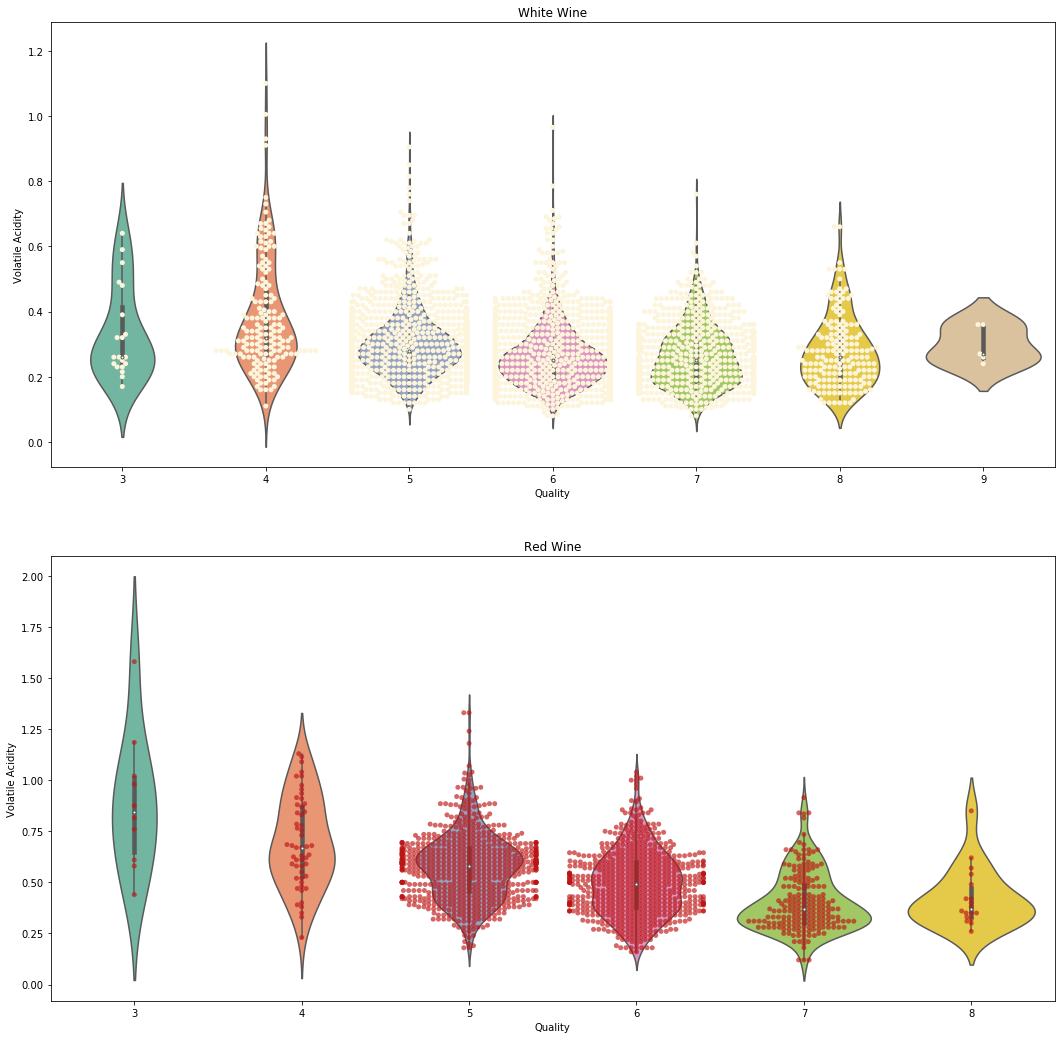

In [11]:
fig,ax = plt.subplots(2,1, figsize= (18, 18))
white = sns.swarmplot(x= "quality", y= "volatile acidity",data= white_wine, color= color_dict["white"], ax=ax[0])
white = sns.violinplot(x= "quality", y= "volatile acidity",data= white_wine, palette="Set2", ax=ax[0])
red = sns.swarmplot(x= "quality", y= "volatile acidity",color= color_dict["red"],alpha= .65, data= red_wine, ax=ax[1])
red = sns.violinplot(x= "quality", y= "volatile acidity",data= red_wine, palette="Set2", ax=ax[1])
white.set_xlabel("Quality")
white.set_title("White Wine")
white.set_ylabel("Volatile Acidity")
red.set_xlabel("Quality")
red.set_title("Red Wine")
red.set_ylabel("Volatile Acidity")
display("The Correlaton between quality of White Wine and volatile acidity is: " +
        str(white_wine["volatile acidity"].corr(white_wine["quality"]).round(2)))
display("The Correlaton between quality of Red Wine and volatile acidity is: " +
        str(red_wine["volatile acidity"].corr(red_wine["quality"]).round(2)))
plt.show()

## Distribution of Quality 

In [12]:
red_wine_quality = red_wine["quality"].value_counts(normalize= True).mul(100).rename("percent").reset_index()
white_wine_quality = white_wine["quality"].value_counts(normalize= True).mul(100).rename("percent").reset_index()

'Mean quality of Red Wine is: 5.64'

'Mean quality of White Wine is: 5.88'

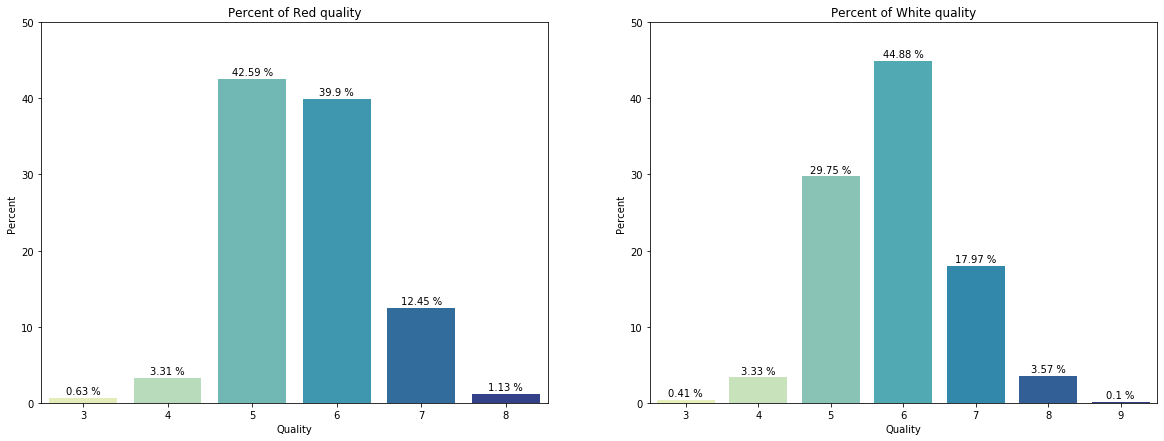

In [13]:
fig,ax = plt.subplots(1, 2, figsize= (20, 7))
red = sns.barplot(x= "index", y= "percent", data= red_wine_quality, palette= "YlGnBu", ax= ax[0])
red.set_xlabel("Quality")
red.set_ylabel("Percent")
red.set_title("Percent of Red quality")
red.set_ylim(0,50)
white = sns.barplot(x= "index", y= "percent", data= white_wine_quality, palette= "YlGnBu", ax= ax[1])
white.set_xlabel("Quality")
white.set_ylabel("Percent")
white.set_title("Percent of White quality")
white.set_ylim(0,50)
# Write mean quality 
display("Mean quality of Red Wine is: " + str(round(red_wine["quality"].mean(), 2)))
display("Mean quality of White Wine is: " + str(round(white_wine["quality"].mean(), 2)))
# Write in each bin 
for p in red.patches:
    height = p.get_height().round(2)
    text = str(height) + " %"
    red.text(p.get_x()+p.get_width()/2,height + .5,text,ha="center")
for p in white.patches:
    height = p.get_height().round(2)
    text = str(height) + " %"
    white.text(p.get_x()+p.get_width()/2,height + .5,text,ha="center")

## Distibution of Acidity Level

In [15]:
acidity_levels_red_edges = [2.74, 3.21, 3.31, 3.4, 4.01]
acidity_levels_red_names = ['High', 'Higher Intermediate' , 'Intermediate', "Low"]
red_wine["acidity_levels"] = pd.cut(red_wine["pH"], acidity_levels_red_edges, labels=acidity_levels_red_names)
acidity_levels_white_edges = [2.72, 3.09, 3.18, 3.28, 3.82]
acidity_levels_white_names = ['High', 'Higher Intermediate' , 'Intermediate', "Low"]
white_wine["acidity_levels"] = pd.cut(white_wine["pH"], acidity_levels_white_edges, labels=acidity_levels_white_names)

In [16]:
white_wine_acidity_levels = white_wine.groupby("acidity_levels")["quality"].mean().reset_index()
red_wine_acidity_levels = red_wine.groupby("acidity_levels")["quality"].mean().reset_index()

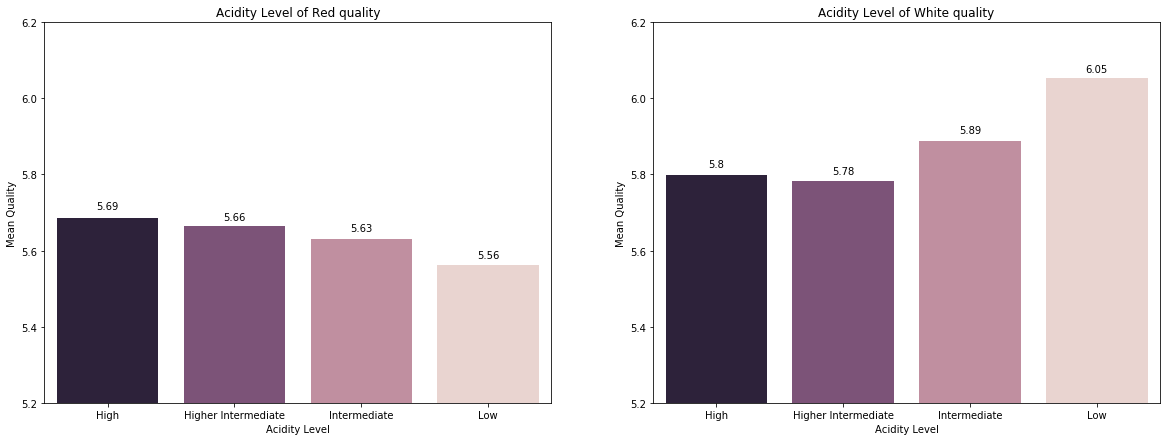

In [17]:
fig,ax = plt.subplots(1, 2, figsize= (20, 7))
red = sns.barplot(x= "acidity_levels", y= "quality", data= red_wine_acidity_levels,
                  palette= sns.cubehelix_palette(4, reverse= True), ax= ax[0])
red.set_xlabel("Acidity Level")
red.set_ylabel("Mean Quality")
red.set_title("Acidity Level of Red quality")
red.set_ylim(5.2,6.2)
white = sns.barplot(x= "acidity_levels", y= "quality", data= white_wine_acidity_levels,
                    palette= sns.cubehelix_palette(4, reverse= True), ax= ax[1])
white.set_xlabel("Acidity Level")
white.set_ylabel("Mean Quality")
white.set_title("Acidity Level of White quality")
white.set_ylim(5.2,6.2)

# Write in each bin 
for p in red.patches:
    height = p.get_height().round(2)
    text = str(height)
    red.text(p.get_x()+p.get_width()/2,height + .02,text,ha="center")
for p in white.patches:
    height = p.get_height().round(2)
    text = str(height)
    white.text(p.get_x()+p.get_width()/2,height + .02,text,ha="center")

## Distribution of Alcohol

In [18]:
alcoholic_levels_red_edges = [8.4, 9.5, 10.2, 11.1, 14.9]
alcoholic_levels_red_names = ["Low", "Intermediate", "Higher Intermediate", "High"]
red_wine["alcoholic_levels"] = pd.cut(red_wine["alcohol"], alcoholic_levels_red_edges, labels=alcoholic_levels_red_names)
alcoholic_levels_white_edges = [8, 9.5, 10.4, 11.4, 14.2]
alcoholic_levels_white_names = ["Low", "Intermediate", "Higher Intermediate", "High"]
white_wine["alcoholic_levels"] = pd.cut(white_wine["alcohol"], alcoholic_levels_white_edges, labels=alcoholic_levels_white_names)

In [19]:
white_wine_alcoholic_levels = white_wine.groupby("alcoholic_levels")["quality"].mean().reset_index()
red_wine_alcoholic_levels = red_wine.groupby("alcoholic_levels")["quality"].mean().reset_index()

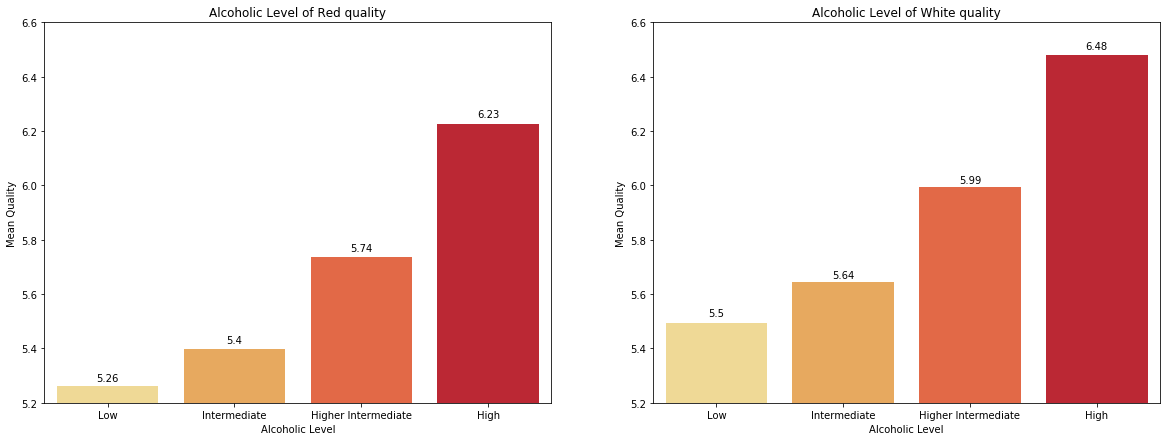

In [20]:
fig,ax = plt.subplots(1, 2, figsize= (20, 7))
red = sns.barplot(x= "alcoholic_levels", y= "quality", data= red_wine_alcoholic_levels,
                  palette= "YlOrRd", ax= ax[0])
red.set_xlabel("Alcoholic Level")
red.set_ylabel("Mean Quality")
red.set_title("Alcoholic Level of Red quality")
red.set_ylim(5.2,6.6)
white = sns.barplot(x= "alcoholic_levels", y= "quality", data= white_wine_alcoholic_levels,
                    palette= "YlOrRd", ax= ax[1])
white.set_xlabel("Alcoholic Level")
white.set_ylabel("Mean Quality")
white.set_title("Alcoholic Level of White quality")
white.set_ylim(5.2,6.6)

# Write in each bin 
for p in red.patches:
    height = p.get_height().round(2)
    text = str(height)
    red.text(p.get_x()+p.get_width()/2,height + .02,text,ha="center")
for p in white.patches:
    height = p.get_height().round(2)
    text = str(height)
    white.text(p.get_x()+p.get_width()/2,height + .02,text,ha="center")